# Soccer Data Analysis

### Answered 5 questions which are normally asked in every new season

Q1) List of European **Strikers** any club can purchase in jan' 17  to get instant boost good enough to get silverware<br>
Q2) List of European **Defenders** any club can purchase purchase in jan' 17  to get instant boost good enough to get silverware<br>
Q3) List of European **Goal Keepers** any club can purchase purchase in jan' 17  to get instant boost good enough to get silverware<br>
Q4) Which **leagues** have the best home advantage and home fan entertainment<br>
Q5) Which **Teams** are best in entertaining their home fans<br>
Q6) Finding style of gameplay of different teams

We used kaggle database to get european football dataset from 2008-2016
[European Soccer Database](https://www.kaggle.com/hugomathien/soccer)


In [36]:
import pandas as pd
import numpy as np
import sqlite3
import pprint
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="ticks")
pp = pprint.PrettyPrinter()

In [2]:
data = sqlite3.connect('database.sqlite')

In [3]:
match = pd.read_sql("SELECT * FROM Match", data)
match_df = pd.DataFrame(match)

league = pd.read_sql("SELECT * FROM League", data)
league_df = pd.DataFrame(league)

#merging match and league dataframe 
match_details_df = pd.merge(match_df, league_df, on='country_id', how='outer')

player_attributes = pd.read_sql("SELECT * FROM Player_Attributes", data)
player_attributes_df = pd.DataFrame(player_attributes)

player = pd.read_sql("SELECT * FROM Player", data)
player_df = pd.DataFrame(player)

#merging player and player attributes dataframe
player_total_df = pd.merge(player_df, player_attributes, on='player_api_id', how='outer')

Since Api id was same in table "Match" and table "Team"
but the problem was name of both the columns were different, So column name is supposed to rename so that I can merge them with api id as same column name in both tables

In [4]:
team = pd.read_sql("SELECT * FROM Team", data)
team_df = pd.DataFrame(team)

new_col = match_df.columns.values
new_col[7] = 'team_api_id'
match_df.columns = new_col

# merging team and match dataframe
team_total_df = pd.merge(team_df,match_df, on='team_api_id', how='outer')

team_attributes = pd.read_sql("SELECT * FROM Team_Attributes", data)
team_attributes_df = pd.DataFrame(team_attributes)

# merging team and team attributes dataframe
team_attributes_total_df = pd.merge(team, team_attributes, on='team_api_id', how='outer')

### Cleaning datatype

In [5]:
player_total_df['date'] = pd.to_datetime(player_total_df['date'])
team_total_df['date'] = pd.to_datetime(team_total_df['date'])

### Taking players who performed well recently as per 2016
Since we are suppossed to find the best players to purchase as per 2017 transfer window (since the data we have is upto 2016)
primary condition noticed as per purchase is that the player must be in his top most form in recent days, Player attribute table had the details for every year so we considered players according to their 2016 form

In [6]:
def pick_year(x):
    #y = datetime.strptime(x, '%Y %m %d %I:%M%:%S' )
    z = str(x).split('-')[0]
    return int(z)

### Cleaning data frame
Since player names are repeated we took most recent player attributes(nearest to dec' 16), we created datframes with unique players(with player id not with player names, since many players have common names)

In [7]:
player_attributes_df = player_attributes_df.sort_values(by='date')
player_attributes_df = player_attributes_df.drop(player_attributes_df[player_attributes_df['date'].map(pick_year)
                                                                      != 2016].index)

In [8]:
def arranging_data(s,l,limit = 10):
    for x in l:
        if x not in s:
            s.append(x)
            if len(s) == limit:
                return s
    return s

10 European Strikers any club shall purchase in jan' 17 to get instant boost good enough to get silverware

In [18]:
#since we are considering attributes therefore we need to replace nan elements by 0
player_total_df.update(player_total_df[['finishing', 'shot_power', 'acceleration', 'aggression', 'stamina',
                                        'agility', 'positioning', 'strength', 'volleys', 'curve',
                                        'heading_accuracy', 'dribbling']].fillna(0))

# best attacking players in europe according to their gameplay and personal abilities
player_total_df['attack_grade'] = player_total_df[['finishing', 'shot_power', 'acceleration', 'aggression', 'stamina',
                                                   'agility', 'positioning', 'strength', 'volleys', 'curve',
                                                   'heading_accuracy', 'dribbling']].mean(axis=1)
player_total_df_attack_grade = player_total_df.sort_values(by=['attack_grade'], ascending=False)

best_strikers = []
print('Best strikers to purchase for european football in 2017 transfer window')
best_strikers = arranging_data(best_strikers,player_total_df_attack_grade['player_name'])
pp.pprint(best_strikers)
#print(arranging_data(list_attacker,player_total_df_attack_grade['player_name'],15))

Best strikers to purchase for european football in 2017 transfer window
['Cristiano Ronaldo',
 'Wayne Rooney',
 'Didier Drogba',
 'Fernando Torres',
 'Luis Suarez',
 'Zlatan Ibrahimovic',
 'David Villa',
 'Carlos Tevez',
 'Diego Milito',
 'Lisandro Lopez']


10 European Defenders any club shall purchase in jan' 17 to get instant boost good enough to get silverware

In [19]:
# best defencive player to purchase in 2017 for european soccer according to their gameplay and personal abilities
player_total_df['defence_grade'] = player_total_df[['interceptions', 'marking', 'standing_tackle', 'sliding_tackle',
                                                    'long_shots', 'reactions', 'agility', 'jumping', 'stamina',
                                                    'long_passing', 'short_passing', 'interceptions', 'vision',
                                                    'positioning', 'agility']].mean(axis=1)
player_total_df_defence_grade = player_total_df.sort_values(by=['defence_grade'], ascending=False)

list_defender = []
print('Best defenders to purchase for european football in 2017 transfer window')
pp.pprint(arranging_data(list_defender,player_total_df_defence_grade['player_name']))
print('')

Best defenders to purchase for european football in 2017 transfer window
['Michael Essien',
 'Esteban Cambiasso',
 'Philipp Lahm',
 'Daniel Alves',
 'Daniele De Rossi',
 'Maicon',
 'Cesc Fabregas',
 'Radja Nainggolan',
 'Arturo Vidal',
 'Ze Roberto']



#### 10 European Goal keeper any club shall purchase in jan' 17 to get instant boost good enough to get silverware

In [20]:
#since we are considering attributes therefore we need to replace nan elements by 0
player_total_df.update(player_total_df[['potential', 'agility', 'reactions','balance', 'gk_kicking',
                                        'gk_diving','gk_reflexes','gk_handling', 'gk_positioning']].fillna(0))

# best goalkeeper to purchase in europe according to their gameplay and personal abilities
player_total_df['gk_grade'] = player_total_df[['potential', 'agility', 'reactions','balance', 'gk_kicking',
                                               'gk_diving','gk_reflexes','gk_handling', 'gk_positioning']].mean(axis=1)
player_total_df_gk_grade = player_total_df.sort_values(by=['gk_grade'], ascending=False)

list_gk = []
print('Best goal keeper to purchase for european football in 2017 transfer window')
pp.pprint(arranging_data(list_gk, player_total_df_gk_grade['player_name']))
print('')

Best goal keeper to purchase for european football in 2017 transfer window
['Gianluigi Buffon',
 'Julio Cesar',
 'Iker Casillas',
 'Petr Cech',
 'Manuel Neuer',
 'Maarten Stekelenburg',
 'Andres Palop',
 'Victor Valdes',
 'Sebastian Frey',
 'Rene Adler']



#### Leagues which have best home advantage
To get home advantage we first calculated total goals scored on home ground as per league and then their difference with away goals<br>
we created a dataframe with league name and their average home goals per match

In [50]:
#since we are considering home and away goals therefore there are no nan elements 

match_details_df_league = match_details_df.groupby('league_id')

home_away_goal_diff = match_details_df_league['home_team_goal'].mean() - match_details_df_league['away_team_goal'].mean()
league_df['average_goals_per_match'] = [i for i in home_away_goal_diff]

#league_df.sort_values(by='average_goals_per_match', ascending = False)
league_name_score = league_df[['name','average_goals_per_match']]
print(league_name_score)
print("")

                        name  average_goals_per_match
0     Belgium Jupiler League                 0.417245
1     England Premier League                 0.391447
2             France Ligue 1                 0.362829
3      Germany 1. Bundesliga                 0.351716
4              Italy Serie A                 0.384819
5     Netherlands Eredivisie                 0.478758
6         Poland Ekstraklasa                 0.364583
7   Portugal Liga ZON Sagres                 0.282164
8    Scotland Premier League                 0.224781
9            Spain LIGA BBVA                 0.495395
10  Switzerland Super League                 0.396624



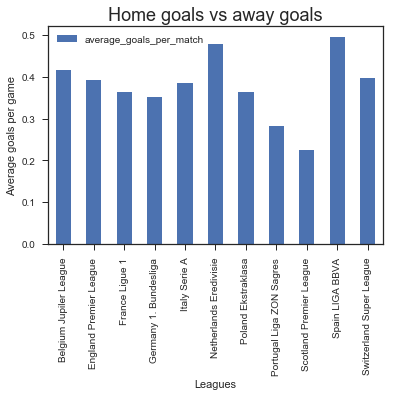

In [47]:
league_name_score.plot.bar(x='name', y='average_goals_per_match')
plt.title('Home goals vs away goals', fontsize=18)
plt.xlabel('Leagues')
plt.ylabel('Average goals per game')
plt.show()

#### best 3  leagues as per home advantage

In [25]:
league_name_score = league_name_score.sort_values(by='average_goals_per_match', ascending = False)
print('European leagues where home ground effect is maximum')
print(league_name_score[0:5])

European leagues where home ground effect is maximum
                        name  average_goals_per_match
9            Spain LIGA BBVA                 0.495395
5     Netherlands Eredivisie                 0.478758
0     Belgium Jupiler League                 0.417245
10  Switzerland Super League                 0.396624
1     England Premier League                 0.391447


#### Teams that are best in entertaining their home fans
Best entertainment is counted as per goals scored per match, more goals scored = more entertainment<br>
to count this we created a dataframe with team names and their average goals per match and sorted them in order to get best 20

In [26]:
#since we are considering home and away goals therefore there are no nan elements 

match_details_df_team = team_total_df.groupby('team_api_id')
home_away_goal_diff_team = match_details_df_team['home_team_goal'].mean() - match_details_df_team['away_team_goal'].mean()
team_df['home_away_goal_diff'] = [i for i in home_away_goal_diff_team]
team_df = team_df.sort_values(by='home_away_goal_diff', ascending = False)
team_df_score = team_df[['team_long_name','home_away_goal_diff']]

print('European teams where home ground effect is maximum')
print(team_df_score.iloc[:10])
print("")

European teams where home ground effect is maximum
      team_long_name  home_away_goal_diff
141            Lecce             2.592105
140           Torino             2.355263
191      Lech Poznań             2.102941
131  Reggio Calabria             2.073529
233          Tondela             1.980263
174     RKC Waalwijk             1.927419
175        VVV-Venlo             1.854839
145          Livorno             1.794118
114  1. FSV Mainz 05             1.592105
142          Udinese             1.584906



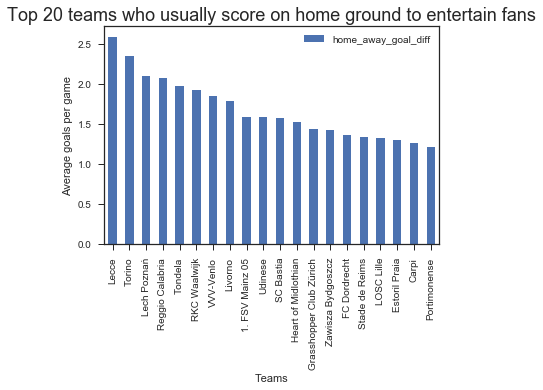

In [43]:
team_df_score[0:20].plot.bar(x='team_long_name', y='home_away_goal_diff', width=0.5)
plt.title('Top 20 teams who usually score on home ground to entertain fans', fontsize=18)
plt.xlabel('Teams')
plt.ylabel('Average goals per game')
plt.show()

### Distributing teams according to their gameplay

Since it is always difficult to find gameplay as style is what difficult to come under numbers
but there are certain attributes within build up style which can be numbered like build up in passing, speed and dribbling. If we account these numbers all together then we can estimate game play style for build up of every team

For this we need to merge team attributes and team dataframe(done in above cells) and calculate mean with row and save the grade(score) in appropriate manner such that it can be reused

In [31]:
#since we are considering attributes therefore we need to replace nan elements by 0
team_attributes_total_df.update(team_attributes_total_df[['buildUpPlaySpeed', 'buildUpPlayDribbling','buildUpPlayPassing']].fillna(0))


team_df['buildUp_grade'] = team_attributes_total_df[['buildUpPlaySpeed', 'buildUpPlayDribbling','buildUpPlayPassing']].mean(axis=1)
team_df = team_df.sort_values(by=['buildUp_grade'], ascending=False)

list_BuildUp_grade = []
list_BuildUp_grade = arranging_data(list_BuildUp_grade, team_df['buildUp_grade'])
# list_BuildUp_team = arranging_data_2(list_BuildUp_grade,team_df['team_long_name'],team_df['buildUp_grade'])
print('Team with most build up on field')
team_buildUp_score = team_df[['team_long_name','buildUp_grade']]
pp.pprint(team_buildUp_score[:20])
print('')

Team with most build up on field
                team_long_name  buildUp_grade
191                Lech Poznań           75.0
192              GKS Bełchatów           74.0
138                  Sampdoria           72.5
46     Wolverhampton Wanderers           72.5
141                      Lecce           70.0
225                   Feirense           70.0
291                   FC Vaduz           70.0
297         FC Lausanne-Sports           70.0
285              AC Bellinzona           70.0
267    Athletic Club de Bilbao           70.0
171              SC Heerenveen           70.0
237                 Motherwell           70.0
213                    Amadora           70.0
258               FC Barcelona           70.0
219           Naval 1° de Maio           70.0
249             Ross County FC           70.0
273                CD Tenerife           70.0
227              Moreirense FC           67.5
279           RC Celta de Vigo           67.5
255  RC Deportivo de La Coruña           67.5



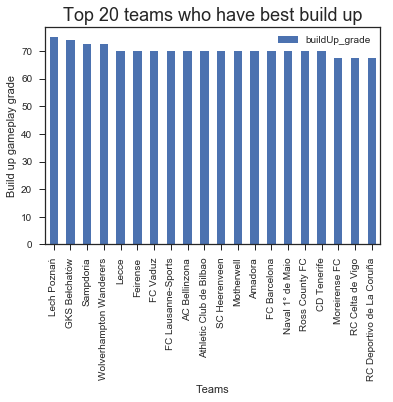

In [42]:
team_buildUp_score[:20].plot.bar(x='team_long_name', y='buildUp_grade', width=0.5)
plt.title('Top 20 teams who have best build up', fontsize=18)
plt.xlabel('Teams')
plt.ylabel('Build up gameplay grade')
plt.show()

There are certain attributes within Chance creation style as well which can be numbered like build up but in passing, shooting and crossing. If we account these numbers all together then we can estimate game play style for Chance creation of every team

For this we need to merge team attributes and team dataframe(done in above cells) and calculate mean with row and save the grade(score) in appropriate manner such that it can be reused

In [34]:
#since we are considering attributes therefore we need to replace nan elements by 0
team_attributes_total_df.update(team_attributes_total_df[['chanceCreationPassing', 'chanceCreationCrossing', 'chanceCreationShooting']].fillna(0))

team_df['chanceCreation_grade'] = team_attributes_total_df[['chanceCreationPassing', 'chanceCreationCrossing', 'chanceCreationShooting']].mean(axis=1)
team_df = team_df.sort_values(by=['chanceCreation_grade'], ascending=False)

list_chanceCreation_grade = []
list_chanceCreation_team = arranging_data(list_chanceCreation_grade, team_df['chanceCreation_grade'],20)
team_chanceCreation_score = team_df[['team_long_name','chanceCreation_grade']]
print('Team with most build up on field')
pp.pprint(team_chanceCreation_score[:20])
print('')

Team with most build up on field
              team_long_name  chanceCreation_grade
178               SC Cambuur             70.000000
231              Boavista FC             70.000000
279         RC Celta de Vigo             70.000000
225                 Feirense             70.000000
249           Ross County FC             70.000000
154                Frosinone             70.000000
267  Athletic Club de Bilbao             70.000000
243               St. Mirren             70.000000
219         Naval 1° de Maio             70.000000
273              CD Tenerife             68.333333
261   Real Sporting de Gijón             68.333333
297       FC Lausanne-Sports             68.333333
237               Motherwell             68.333333
223             Portimonense             68.000000
224             SC Beira Mar             67.666667
23               KV Oostende             66.666667
291                 FC Vaduz             66.666667
100            VfL Wolfsburg             66.66666

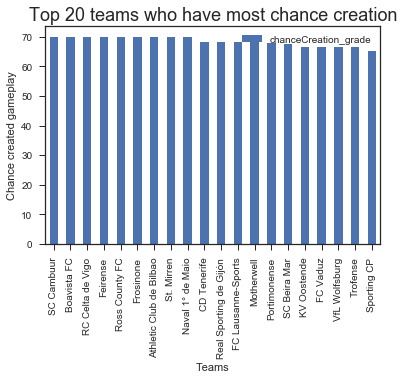

In [41]:
team_chanceCreation_score[:20].plot.bar(x='team_long_name', y='chanceCreation_grade', width=0.5)
plt.title('Top 20 teams who have most chance creation', fontsize=18)
plt.xlabel('Teams')
plt.ylabel('Chance created gameplay')
plt.show()